In [1]:
#this example combines multiple clustering models, uses Cluster Ensemble

#imports
import numpy as np

from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn import datasets

from combo.models.cluster_comb import clusterer_ensemble_scores
from combo.models.cluster_comb import ClustererEnsemble
from combo.utils.example import visualize_clusters

import warnings

warnings.filterwarnings("ignore")

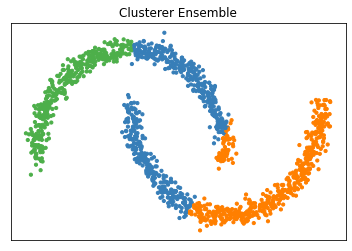

In [2]:
if __name__ == "__main__":
    random_state = 42

    #number of cluster
    n_clusters = 3
    #number of estimators (not defined in API references as parameters. Most likely used for base_estimators for shaping)
    n_estimators = 3
    # ============
    # Generate datasets. We choose the size big enough to see the scalability
    # of the algorithms, but not too big to avoid too long running times
    # ============
    #number of samples
    n_samples = 1500
    X, y = datasets.make_moons(n_samples=n_samples, noise=.05)
    
    # Initialize a set of estimators
    estimators = [KMeans(n_clusters=n_clusters),
                  MiniBatchKMeans(n_clusters=n_clusters),
                  AgglomerativeClustering(n_clusters=n_clusters)]
    
    #make cluster ensemble with estimators defined above and of size n_clusters, then train
    clf = ClustererEnsemble(estimators, n_clusters=n_clusters)
    clf.fit(X)
    
    # generate the labels on X
    aligned_labels = clf.aligned_labels_
    predicted_labels = clf.labels_
    
    #I did not see any documentation on this method, but before running I am assuming this generates a graphic of the cluster ensemble
    visualize_clusters('Clusterer Ensemble', X, predicted_labels, show_figure=True, save_figure=False)
    
    # Clusterer Ensemble without initializing a new Class
    original_labels = np.zeros([X.shape[0], n_estimators])

    for i, estimator in enumerate(estimators):
        #train each estimator
        estimator.fit(X)
        #create labels for each estimator
        original_labels[:, i] = estimator.labels_

    # Invoke method directly without initializing a new Class
    # Demo the effect of different parameters
    labels_by_vote1 = clusterer_ensemble_scores(original_labels, n_estimators, n_clusters)
    # return aligned_labels as well
    labels_by_vote2, aligned_labels = clusterer_ensemble_scores(original_labels, n_estimators, n_clusters, return_results=True)

    # select a different reference base estimator (default is 0)
    labels_by_vote3 = clusterer_ensemble_scores(original_labels, n_estimators, n_clusters, reference_idx=1)